In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,googlemaps,json,ast,boto3,sqlalchemy
from termcolor import colored
from ast import literal_eval
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


### 1. Load the data

In [2]:
df = pd.read_csv('feb_half1_2019_6m.csv')
print(df.shape)
df[1:].head()

(6156514, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
1,2452,861107036575059,2019-02-01 00:08:47.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
2,1,861107036575059,2019-02-01 00:08:48.544,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
3,2453,861107036575059,2019-02-01 00:08:49.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
4,2,861107036575059,2019-02-01 00:08:50.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
5,2454,861107036575059,2019-02-01 00:08:51.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0


### 2. Feature Selection

In [3]:
cols = ["camera_id","collision_distance", "distance", "satellite", "hdop", "speed", "lat", "lon", "speed_skor", "focus_skor", "guard_skor", "heading"]
dff = df[cols]
dff = dff.fillna(0)
dff.head()

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading
0,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
3,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


### 3. Scoring

In [4]:
dff['skor'] = (dff.speed_skor + dff.focus_skor + dff.guard_skor) / 3
dff.head()

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading,skor
0,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
2,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
3,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
4,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333


### 4. Group By ID and Average

In [5]:
df_id = dff.groupby('camera_id').mean()
df_id = df_id.reset_index()
df_id

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading,skor
0,861107036059112,0.261299,98.902873,7.282585,1.044038,12.077663,39.014803,-85.138822,99.878090,6.032120,92.200603,159.183581,66.036938
1,861107036063171,0.000000,89.348220,7.058632,0.844463,11.439739,37.974047,-82.859809,90.472313,0.000000,90.244300,142.173453,60.238871
2,861107036077593,0.000000,0.000000,0.000000,0.000000,0.000000,12.251549,-26.730578,0.000000,0.000000,0.000000,0.000000,0.000000
3,861107036103571,0.000000,41.693942,6.529495,1.181339,16.070831,37.673284,-82.142731,99.938540,2.007352,92.585314,154.068366,64.843735
4,861107036108463,0.030486,123.914569,7.618443,1.015623,15.075472,39.578438,-86.295442,99.911783,9.099884,97.350933,167.669453,68.787533
5,861107036111616,0.044426,119.183299,4.211766,1.778222,12.150811,32.262332,-70.366916,99.954102,3.503412,83.277615,129.786989,62.245043
6,861107036115740,0.041671,82.249429,7.563696,0.949041,14.208426,39.944235,-87.148491,99.950559,5.531087,97.441492,165.688201,67.641046
7,861107036125582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.909209,30.048470,0.000000,0.000000,43.319227
8,861107036164086,0.470863,4.194862,5.136184,0.897506,12.152241,29.621718,116.131135,98.981540,9.306213,59.063793,135.360125,55.783849
9,861107036165505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.966833,0.000000,0.000000,0.000000,33.322278


### 4. Features for clustering. Distance vs SKOR

In [6]:
feature = df_id[['distance','skor']]
feature.head()

,distance,skor
0,98.902873,66.036938
1,89.348220,60.238871
2,0.000000,0.000000
3,41.693942,64.843735
4,123.914569,68.787533


### 5. ML Clustering with Kmeans with 4 classes

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
predict.head()

,predict
0,2
1,2
2,3
3,0
4,2


In [9]:
final = pd.concat([feature, predict], axis = 1)
final.head()

,distance,skor,predict
0,98.902873,66.036938,2
1,89.348220,60.238871,2
2,0.000000,0.000000,3
3,41.693942,64.843735,0
4,123.914569,68.787533,2


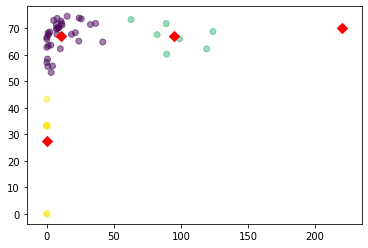

In [10]:
plt.scatter(final['distance'],final['skor'], c = final['predict'], alpha = 0.5)
centers = pd.DataFrame(model.cluster_centers_, columns = ['distance','skor'])
center_x = centers['distance']
center_y = centers['skor']
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

### Scaling with pipeline

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
scaler = StandardScaler()
model = KMeans(n_clusters = 4)
pipeline = make_pipeline(scaler, model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
